# Breast Cancer Wisconsin
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/tmp/ipykernel_17565/580278352.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading the dataset.

In [ ]:
df = pd.read_csv('wdbc.data')
df.head()

,id,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Pre-Processing the data (Handling missing values, Encoding, Normalization, Standardization). & Exploratory Data Analysis.

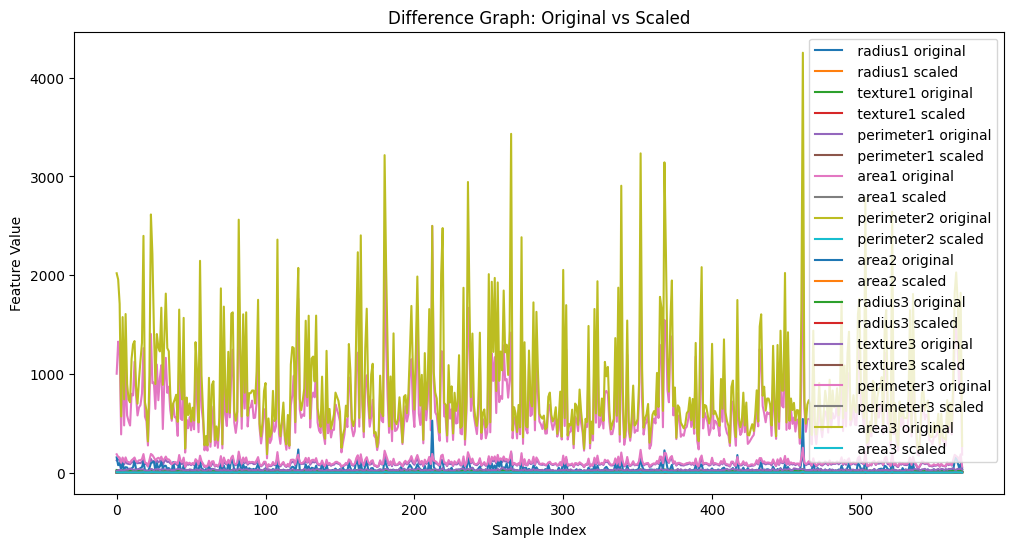

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

selected_features = [' radius1', ' texture1', ' perimeter1', ' area1', ' perimeter2', ' area2', ' radius3', ' texture3', ' perimeter3', ' area3']
X = df[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

plt.figure(figsize=(12, 6))
for feature in selected_features:
    plt.plot(X[feature], label=f'{feature} original')
    plt.plot(X_scaled_df[feature], label=f'{feature} scaled')
plt.title('Difference Graph: Original vs Scaled')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()


In [ ]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

## Feature Engineering techniques.

In [ ]:


k = 10
select_k_best = SelectKBest(score_func=chi2, k=k)
X_new = select_k_best.fit_transform(X, y)

selected_features = X.columns[select_k_best.get_support(indices=True)]

print("Selected features:", selected_features)


Selected features: Index([' radius1', ' texture1', ' perimeter1', ' area1', ' perimeter2',
       ' area2', ' radius3', ' texture3', ' perimeter3', ' area3'],
      dtype='object')


## Split the data into training, testing and validation sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection.

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust hyperparameters as needed
ada_boost

AdaBoostClassifier(random_state=42)

## Train the model.

In [ ]:
ada_boost.fit(X_train, y_train)

/home/dev/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [ ]:
y_pred = ada_boost.predict(X_test)

## Test the model.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


# GitHub link: https://github.com/rohith18111407/Machine-Learning-Lab/tree/main/Exercise-8